In [38]:
import pyclesperanto_prototype as cle

cle.select_device('RTX')

<GeForce RTX 2070 on Platform: NVIDIA CUDA (2 refs)>

In [20]:
%gui qt

In [21]:
# convenience methods
def show(image, title=None, labels=False, use_napari=False):
    if len(image.shape) == 3:
        # print(image.shape)
        max_projection = cle.create([image.shape[1], image.shape[2]])
        cle.maximum_z_projection(image, max_projection)
        cle.imshow(cle.transpose_xy(max_projection), labels=labels, min_display_intensity=0)
    else:
        cle.imshow(cle.transpose_xy(image), labels=labels, min_display_intensity=0)    
    
    if use_napari:
        if labels:
            show.viewer.add_labels(cle.pull_zyx(image), name=title)
        else:
            show.viewer.add_image(cle.pull_zyx(image), name=title)

import napari

# create Qt GUI context
napari.gui_qt()        
show.viewer = napari.Viewer()


In [22]:
image0 = cle.imread('data/Lund_001200_head_lobe_crop.tif')


Result of top_hat_box

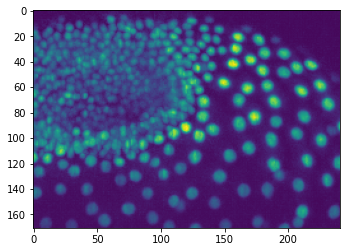

In [25]:
# Layer Result of top_hat_box
image1 = cle.create_like(image0)
r = cle.top_hat_box(image0, image1, 5.0, 5.0, 5.0)

# show result
show(image1, 'background_subtracted')

Result of gaussian_blur

In [27]:
# Layer Result of gaussian_blur
image2 = cle.create_like(image1)
r = cle.gaussian_blur(image1, image2, 0.0, 0.0, 0.0)


Result of detect_maxima_box

In [30]:
# Layer Result of detect_maxima_box
image3 = cle.create_like(image2)
r = cle.detect_maxima_box(image2, image3, 1, 1, 1)


In [32]:
# Layer Result of threshold_otsu
image4 = cle.create_like(image2)
r = cle.threshold_otsu(image2, image4)


Result of binary_and

In [33]:
# Layer Result of binary_and
image5 = cle.create_like(image4)
r = cle.binary_and(image4, image3, image5)


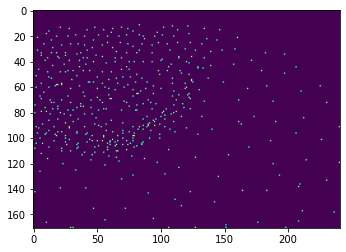

In [35]:
# show result
show(image5, 'Result of binary_and')



Result of connected_components_labeling_box

In [37]:
# Layer Result of connected_components_labeling_box
image6 = cle.create_like(image5)
r = cle.connected_components_labeling_box(image5, image6)


Result of extend_labels_with_maximum_radius

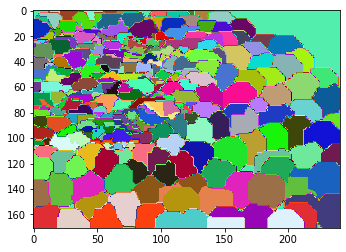

In [40]:
# Layer Result of extend_labels_with_maximum_radius
image7 = cle.create_like(image6)
cle.extend_labels_with_maximum_radius(image6, image7, 14.0)

show(image7, 'Labels', labels=True)

Result of draw_mesh_between_touching_labels

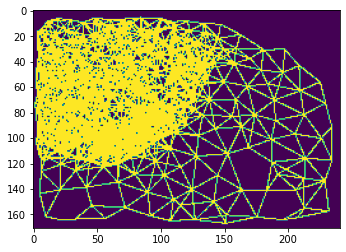

In [48]:
# Layer Result of draw_mesh_between_touching_labels
image8 = cle.draw_mesh_between_touching_labels(image7)

show(image8, 'Result of draw_mesh_between_touching_labels', False)

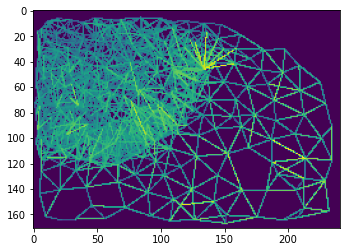

In [49]:
image8b = cle.draw_distance_mesh_between_touching_labels(image7)

show(image8b, 'distance_mesh', False)

Result of touching_neighbor_count_map

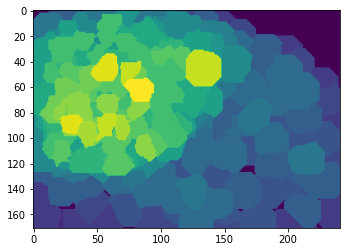

In [47]:
# Layer Result of touching_neighbor_count_map
image9 = cle.touching_neighbor_count_map(image7)

show(image9, 'Result of touching_neighbor_count_map', False)